## VC_1_Lab_04_MNIST_ML

Neste jupyter vamos tentar classificar imagens de dígitos feitos à mão com técnicas tradicionais de Machine Learning

A base de dados MNIST consiste em uma base de imagens de dígitos escritos à mão

### Visão Computacional 1

### Prof: José Humberto Cruvinel

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [16]:
!pip install sklearn

In [17]:
# Importando pacotes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [18]:
# Carregando o dataset DIGITS
%%time
from sklearn.datasets import fetch_openml
 
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print('Data shape:',X.shape) 
print('Label shape:',y.shape)

Data shape: (70000, 784)
Label shape: (70000,)
CPU times: user 19 s, sys: 353 ms, total: 19.4 s
Wall time: 19.4 s


In [19]:
X = np.reshape(X, (-1, 28, 28)) 
X.shape 

(70000, 28, 28)

Text(0.5, 1.0, 'Label: 5')

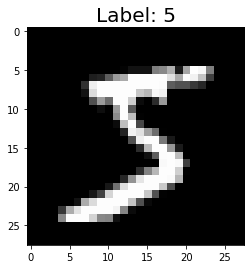

In [20]:
plt.imshow(X[0], cmap=plt.cm.gray)
plt.title('Label: {}'.format(y[0]), fontsize = 20)

In [21]:
%%time 
import cv2 

X_resized = np.asarray([cv2.resize(img, dsize=(20, 20), interpolation=cv2.INTER_CUBIC) for img in X]) 
print(X_resized.shape) 

(70000, 20, 20)
CPU times: user 798 ms, sys: 174 ms, total: 972 ms
Wall time: 976 ms


Text(0.5, 1.0, 'Label: 5')

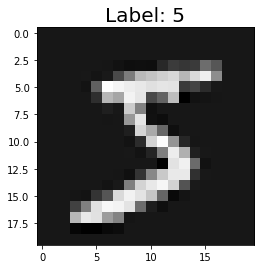

In [38]:
plt.imshow(X_resized[0], cmap=plt.cm.gray)
plt.title('Label: {}'.format(y[0]), fontsize = 20)

In [26]:
X = np.reshape(X_resized, (-1, 400)) 
X.shape 

(70000, 400)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (52500, 400)
y_train: (52500,)
X_test: (17500, 400)
y_test: (17500,)


## Logistic Regression

In [ ]:
# Testando a classificação com Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [29]:
# Fazendo previsões
predictions = log_reg.predict(X_test)

In [30]:
# Vamos plotar o Score geral do modelo
score = log_reg.score(X_test, y_test)
print('Score:',score)

Score: 0.9194857142857142


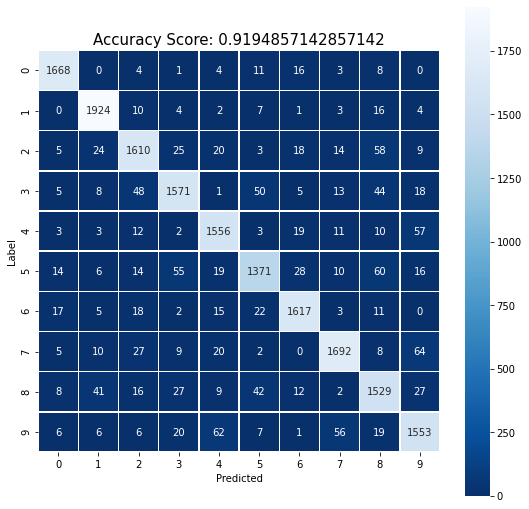

In [31]:
# Plotando a matriz de confusão para analisar a qualidade do nosso classificador

import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_score = knn.score(X_test, y_test)
print('Score:', knn_score)

Score: 0.9698285714285714


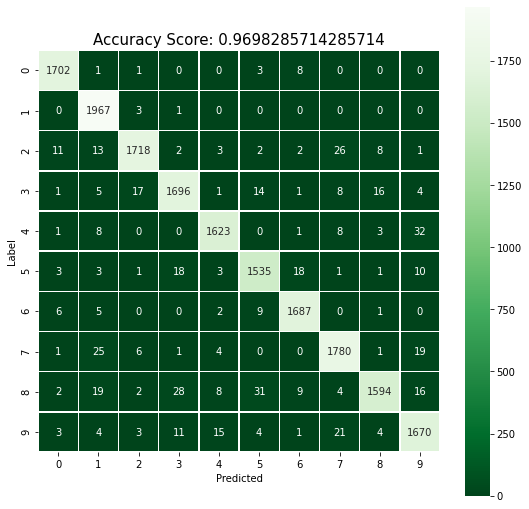

In [33]:
cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(knn_score)
plt.title(all_sample_title, size = 15);

### Random Forrest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_score = rf.score(X_test, y_test)
print('Score:', rf_score)

Score: 0.9628


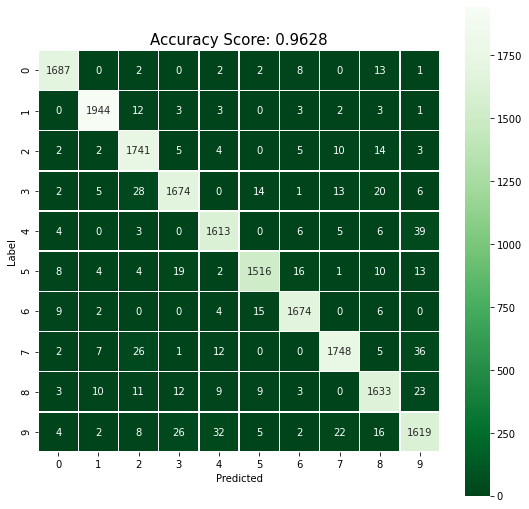

In [35]:
cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(rf_score)
plt.title(all_sample_title, size = 15);

### SVM

In [36]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_score = svm.score(X_test, y_test)
print('Score:', svm_score)

Score: 0.9768571428571429


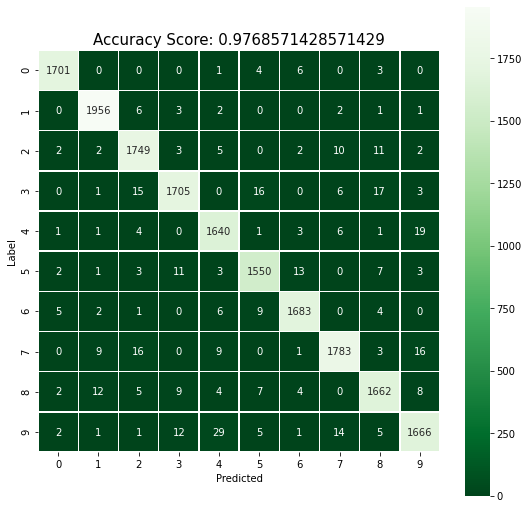

In [37]:
cm = metrics.confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Label');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(svm_score)
plt.title(all_sample_title, size = 15);

# Exercício 4.2

Crie um novo notebook a partir da cópia desse e dê o nome abaixo:

* **VC_1_Lab_04_MNIST_ML_Ex_2**

Até agora utilizamos apenas um subset dos dados MNIST, ou seja, 1797 exemplos. 

O dataset oficial (http://yann.lecun.com/exdb/mnist/) possui 70.000 exemplos, sendo 60.000 de treino e 10.000 de teste

Logo, utilize os códigos abaixo para baixar todos os dados MNIST

```
%%time
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print('Data shape:',X.shape) 
print('Label shape:',y.shape)
```

Perceba que estamos utilizando o comando %%time para mostrar o tempo de processamento da célula de código. Quando trabalhamos com muitas imagens é importante saber quanto tempo leva o processamento.

Realize o mesmo processo utilizando os métodos já utilizados. 

Qual teve melhor resultado?

Quais dificuldades você observou ao tratar com um volume maior de imagens?

**Resposta**: Uma das dificuldades foi o tempo de execução. E outra foi que os modelos não performaram tão bem, houve um redução da acurácia. Melhor modelo foi o SVC com 0.97.

FIM